In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime
from google_news import fetch_news

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv.gz'
all_df_headlines = pd.read_csv(all_headlines_csv, compression='gzip')

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-06-13 16:09'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})


In [5]:
country_tlds = pd.read_csv('https://raw.githubusercontent.com/alext234/ccTLD/master/data/cc_tld.csv')

In [6]:
titles = set()
for _, tld in country_tlds.iterrows():
    gnews_url = 'https://news.google.com'+tld[0]
    try:
        titles.update(fetch_news(gnews_url))
        print(f'fetched {gnews_url}')
    except Exception as e:
        # probably some country TLD do not have a google news domain
        pass


fetched https://news.google.com.by
fetched https://news.google.com.cn
fetched https://news.google.com.co
fetched https://news.google.com.cu
fetched https://news.google.com.do
fetched https://news.google.com.et
fetched https://news.google.com.fj
fetched https://news.google.com.ge
fetched https://news.google.com.gr
fetched https://news.google.com.gt
fetched https://news.google.com.kh
fetched https://news.google.com.kw
fetched https://news.google.com.lb
fetched https://news.google.com.ly
fetched https://news.google.com.mm
fetched https://news.google.com.mt
fetched https://news.google.com.mx
fetched https://news.google.com.my
fetched https://news.google.com.nf
fetched https://news.google.com.pe
fetched https://news.google.com.ph
fetched https://news.google.com.pk
fetched https://news.google.com.pl
fetched https://news.google.com.pr
fetched https://news.google.com.qa
fetched https://news.google.com.sa
fetched https://news.google.com.sl
fetched https://news.google.com.tj
fetched https://news

In [7]:
assert len(titles)>0

In [8]:
df_latest = pd.DataFrame({'datetime':now, 'headline': list(titles)})

In [9]:
df_latest.head(10)

,datetime,headline
0,2020-06-13 16:09,PTI govt will try to raise taxes through backd...
1,2020-06-13 16:09,محمد الحواجري يكمّم أم كلثوم و«أخواتها»... - ج...
2,2020-06-13 16:09,本港吸煙率微升至10.2% 吸食電子煙比率無增加- 健康百科- - HealthyD
3,2020-06-13 16:09,¿Por qué causan tanta polémica los símbolos de...
4,2020-06-13 16:09,New Horizons сфотографировал две ближайшие к С...
5,2020-06-13 16:09,Trump will hold a Juneteenth Tulsa rally - Vox...
6,2020-06-13 16:09,Minneapolis City Council Unanimously Votes To ...
7,2020-06-13 16:09,فرح الهاشم: سينما بميزانية محدودة - جريدة الأخبار
8,2020-06-13 16:09,شاهد أحدث ظهور لنوال الزغبى.. ومتابعيها شكلك أ...
9,2020-06-13 16:09,Parts of Beijing locked down as new Covid-19 c...


In [10]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [11]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [12]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False,  compression='gzip')

In [13]:
def is_reference_corona(s):
    return (
        ('coronavirus' in s)
        or ('covid-19' in s)
        or ('corona' in s)
        or ('ncov' in s)
    )
        
    
# is_virus is 1 if there is reference to coronavirus
    
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if is_reference_corona(v.lower()) else 0)
)

In [14]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [15]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
642,India sees record 11458 Covid-19 cases in one ...
653,Coronavirus tips: How to minimize your risk of...
690,¿Desea otra ronda de cheques de estímulo por e...
701,Colombia tiene 46.858 casos de coronavirus y 1...
705,Houston weighs another lockdown as coronavirus...


In [16]:
# output json stat 
import json
data_stats_json = 'data/data_stats.json'
data_stats = {'schemaVersion': 1, 
              'label': f'Last update {now}', 
              'message': f'Total number of headlines: {all_df_headlines.shape[0]}'}
with open(data_stats_json, 'w') as fo:
    fo.write(json.dumps(data_stats))
data_stats

{'schemaVersion': 1,
 'label': 'Last update 2020-06-13 16:09',
 'message': 'Total number of headlines: 768276'}

In [17]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [18]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-06-13 16:09:00,2020-06-13 16:09,克萊默稱美股現在「史上最超買」 看好阿里巴巴、索尼 - 自由時報電子報,0,149226
2020-06-13 16:09:00,2020-06-13 16:09,Colombia tiene 46.858 casos de coronavirus y 1...,1,149227
2020-06-13 16:09:00,2020-06-13 16:09,«Довод» и другие фильмы Warner Bros. переносят...,0,149227


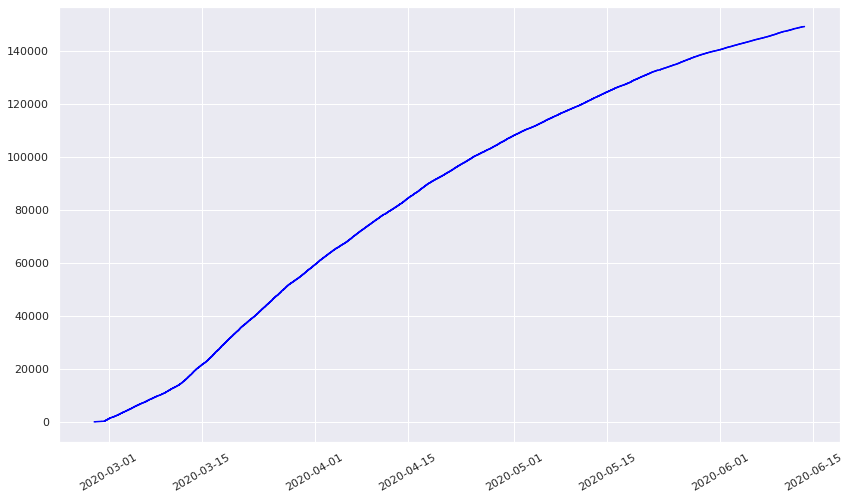

In [19]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [20]:
fig.savefig(png_file)
